In [13]:
#https://github.com/rxYoungho
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM #CuDNNLSTM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import keras



Using TensorFlow backend.


In [4]:
num_feat = ['src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']


In [16]:
df = pd.read_csv('./KDDTrain.csv')
df.info()
df_val = pd.read_csv('./KDDTest.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)


In [5]:
# feature_df = df
# X = np.asarray(feature_df)
# y = np.asarray(df['class'])


In [ ]:
#Change features with object or string value into numeric numbers
ord_feat = ['protocol_type', 'service', 'flag']
#Nom_feat = column value with 0 or 1
nom_feat = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
num_feat = ['src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']

X_train, y_train = df.drop(columns=['class'], axis=1, inplace=False), df['class'].values


ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat].values)
oe.fit(X_train[ord_feat].values)


scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_nom = ohe.transform(X_train[nom_feat].values)
X_train_ord = oe.transform(X_train[ord_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

X_train = np.concatenate([X_train_ord, X_train_num, X_train_nom], axis=1)
#SVM Approach-------------------------------------------------------------------
from sklearn import svm

classifier = svm.SVC(kernel = "linear")
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

from sklearn import metrics
print("SVM ACCURACY : ",metrics.accuracy_score(y_test, y_predict))
#SVM Approach Done--------------------------------------------------------------
#reshape Train dataset into 3d array
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
y_train = y_train.reshape((y_train.shape[0],1,1))

#Scale the num, ord, nom datasets
X_test, y_test = df_val.drop(columns=['class'], axis = 1, inplace=False), df_val['class'].values

ohe.fit(X_test[nom_feat].values)
oe.fit(X_test[ord_feat].values)
#reshape Test dataset into 3d array

scalar.fit(X_test[num_feat].values)
X_test_nom = ohe.transform(X_test[nom_feat].values)
X_test_ord = oe.transform(X_test[ord_feat].values)
X_test_num = scalar.transform(X_test[num_feat].values)
X_test = np.concatenate([X_test_ord, X_test_num, X_test_nom], axis=1)
X_test.shape
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))
y_test = y_test.reshape((y_test.shape[0],1,1))


In [23]:
model = Sequential()
#50 time steps, and 2 features
#LSTM INOUT (Batch size, Time steps, units)
model.add(LSTM(units = 44, input_shape=(1,44), return_sequences=True))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss="mean_absolute_error", optimizer = 'adam', metrics = ["accuracy"])
# model.summary()

history = model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test))# validation_data=(X_test, y_test)

Train on 125973 samples, validate on 52977 samples
Epoch 1/30
125973/125973 [==============================] - 19s 147us/sample - loss: 0.0531 - acc: 0.9619 - val_loss: 0.0517 - val_acc: 0.9701
Epoch 2/30
125973/125973 [==============================] - 17s 132us/sample - loss: 0.0379 - acc: 0.9737 - val_loss: 0.0347 - val_acc: 0.9808
Epoch 3/30
125973/125973 [==============================] - 17s 132us/sample - loss: 0.0304 - acc: 0.9856 - val_loss: 0.0278 - val_acc: 0.9867
Epoch 4/30
125973/125973 [==============================] - 17s 133us/sample - loss: 0.0266 - acc: 0.9883 - val_loss: 0.0270 - val_acc: 0.9880
Epoch 5/30
125973/125973 [==============================] - 17s 132us/sample - loss: 0.0238 - acc: 0.9897 - val_loss: 0.0248 - val_acc: 0.9896
Epoch 6/30
125973/125973 [==============================] - 17s 134us/sample - loss: 0.0223 - acc: 0.9897 - val_loss: 0.0228 - val_acc: 0.9907
Epoch 7/30
125973/125973 [==============================] - 18s 142us/sample - loss: 0.0208

In [24]:
model.save("LSTM_DDoS_Detection.model")
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

52977/52977 [==============================] - 3s 52us/sample - loss: 0.0141 - acc: 0.9938
0.014085674540009275 0.9938086


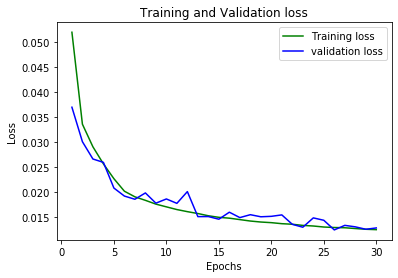

In [10]:
#Visualization of the Loss

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

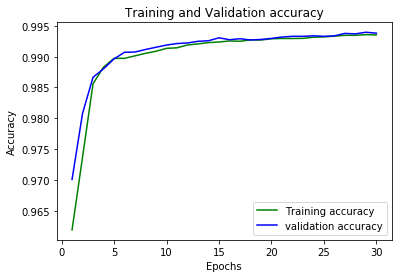

In [26]:
#Visualization of the accuracy.

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()